In [301]:
import pandas as pd

In [302]:
df = pd.read_csv("C:/Users/hoyong/Downloads/서울시 버스정류소 위치정보.csv", encoding = "cp949")

In [303]:
df

,정류소번호,정류소명,X좌표,Y좌표
0,3007,삼각지역,126.974012,37.535270
1,4843,옥수교회,127.015895,37.545305
2,5120,면곡시장,127.079729,37.569746
3,8186,월계2교,127.050133,37.623825
4,8901,수보약국,127.008044,37.608704
...,...,...,...,...
11310,25995,우성아파트,127.139338,37.550386
11311,25996,우성아파트,127.140046,37.550643
11312,25997,조일약국,127.123596,37.533630
11313,25998,성내시장,127.125497,37.536155


In [304]:
df['gps'] = df["X좌표"].map(str) + ", " + df["Y좌표"].map(str)

In [305]:
import requests

## Inverese geo-coding

In [306]:
import time
output = "json"
orders = 'addr'
endpoint = "https://naveropenapi.apigw.ntruss.com/map-reversegeocode/v2/gc"

def get_Add(coords) :

    url = f"{endpoint}?coords={coords}&output={output}&orders={orders}"

    client_id = "kp3p1173j6"
    client_secret = "mjvgNa1r29cPAg1VEJwoV1X8POy6UormTQb8fl44"
    
    headers = {
        "X-NCP-APIGW-API-KEY-ID": client_id,
        "X-NCP-APIGW-API-KEY": client_secret,
    }

    try:
        res = requests.get(url, headers=headers)
        add = res.json()["results"][0]["region"]["area2"]["name"]

    except:
        try :
            time.sleep(0.5)
            res = requests.get(url, headers=headers)
            add = res.json()["results"][0]["region"]["area2"]["name"]
            
        except IndexError :
            add = "Na"

    return add

In [307]:
df["주소"] = df.gps.apply(lambda x : get_Add(x))

In [309]:
df

,정류소번호,정류소명,X좌표,Y좌표,gps,주소
0,3007,삼각지역,126.974012,37.535270,"126.9740118, 37.5352699",용산구
1,4843,옥수교회,127.015895,37.545305,"127.0158952, 37.54530457",성동구
2,5120,면곡시장,127.079729,37.569746,"127.0797293, 37.56974605",광진구
3,8186,월계2교,127.050133,37.623825,"127.050133, 37.623825",성북구
4,8901,수보약국,127.008044,37.608704,"127.0080441, 37.60870425",성북구
...,...,...,...,...,...,...
11310,25995,우성아파트,127.139338,37.550386,"127.1393385, 37.55038573",강동구
11311,25996,우성아파트,127.140046,37.550643,"127.1400464, 37.55064261",강동구
11312,25997,조일약국,127.123596,37.533630,"127.1235962, 37.53363026",강동구
11313,25998,성내시장,127.125497,37.536155,"127.1254968, 37.53615493",강동구


In [310]:
df[df.주소 == "Na"]

,정류소번호,정류소명,X좌표,Y좌표,gps,주소
679,3149,이태원동남산대림아파트.용산동아파트,126.987449,37.539725,"126.9874493, 37.53972531",Na
1732,6002,청년회의소,127.061284,37.561965,"127.0612838, 37.56196532",Na
2731,8462,낙산삼거리,127.010567,37.580267,"127.0105671, 37.5802666",Na
3050,9104,우이동성원아파트,127.013357,37.662045,"127.013357, 37.662045",Na
3207,9279,창문여고,127.035864,37.612134,"127.0358639, 37.61213401",Na
3672,10308,한국사회봉사회,127.015085,37.661543,"127.0150852, 37.66154301",Na
3701,10342,한국사회봉사회,127.014759,37.661814,"127.0147587, 37.66181384",Na
4532,12227,진관초교입구,126.925847,37.646905,"126.9258465, 37.64690517",Na
4534,12230,삼천리골입구56사단북한산부대,126.935117,37.650345,"126.9351168, 37.65034464",Na
4542,12238,진관초교관음사입구,126.926869,37.647774,"126.926869, 37.64777354",Na


결측값들 추가로 inverse geocoding

In [311]:
def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)[0]
    
    gu_list = ['마포구','서대문구','은평구','종로구','중구','용산구','성동구','광진구',
           '동대문구','성북구','강북구','도봉구','노원구','중랑구','강동구','송파구',
           '강남구','서초구','관악구','동작구','영등포구','금천구','구로구','양천구','강서구']
    
    for gu in gu_list :
        if gu in address :
            result = gu
        
        else :
            pass

    return result

In [312]:
df_null = df[df.주소 == "Na"]
df_null['gps'] = df_null["Y좌표"].map(str) + ", " + df_null["X좌표"].map(str)

C:\Users\hoyong\AppData\Local\Temp\ipykernel_35240\4231134437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['gps'] = df_null["Y좌표"].map(str) + ", " + df_null["X좌표"].map(str)


In [314]:
for idx in df_null.index :
    df.loc[idx, ["주소"]] = df_null.loc[idx, ["주소"]]

In [315]:
df[df.주소 == "Na"]

,정류소번호,정류소명,X좌표,Y좌표,gps,주소
679,3149,이태원동남산대림아파트.용산동아파트,126.987449,37.539725,"126.9874493, 37.53972531",Na
1732,6002,청년회의소,127.061284,37.561965,"127.0612838, 37.56196532",Na
2731,8462,낙산삼거리,127.010567,37.580267,"127.0105671, 37.5802666",Na
3050,9104,우이동성원아파트,127.013357,37.662045,"127.013357, 37.662045",Na
3207,9279,창문여고,127.035864,37.612134,"127.0358639, 37.61213401",Na
3672,10308,한국사회봉사회,127.015085,37.661543,"127.0150852, 37.66154301",Na
3701,10342,한국사회봉사회,127.014759,37.661814,"127.0147587, 37.66181384",Na
4532,12227,진관초교입구,126.925847,37.646905,"126.9258465, 37.64690517",Na
4534,12230,삼천리골입구56사단북한산부대,126.935117,37.650345,"126.9351168, 37.65034464",Na
4542,12238,진관초교관음사입구,126.926869,37.647774,"126.926869, 37.64777354",Na


In [ ]:
df.to_csv('bus.csv', index = None, encoding = "cp949") 

In [316]:
df = pd.read_csv("bus.csv", encoding = "cp949")

In [317]:
df = df[df['주소'].map(df['주소'].value_counts()) >= 100]
df2 = df.주소.value_counts().rename_axis('주소').to_frame('버스정류장수')
df2.reset_index(inplace = True)

In [318]:
df = pd.merge(df, df2)

In [319]:
df_econ = pd.read_csv("서울특별시_전월세가_2021.txt", sep = ",", engine='python', encoding = "cp949")

In [320]:
df_econ.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드', '지번구분', '본번', '부번',
       '층', '계약일', '전월세구분', '임대면적', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약기간', '신규계약구분', '갱신청구권사용', '종전보증금', '종전임대료'],
      dtype='object')

In [321]:
df_econ = df_econ[['자치구명', '전월세구분', '보증금(만원)', '임대료(만원)']]

In [322]:
df_econ

,자치구명,전월세구분,보증금(만원),임대료(만원)
0,용산구,월세,500,33
1,용산구,전세,12000,0
2,마포구,월세,10000,55
3,마포구,전세,11000,0
4,금천구,월세,500,50
...,...,...,...,...
524670,강북구,월세,4000,120
524671,중랑구,전세,17000,0
524672,동작구,월세,5000,60
524673,관악구,전세,26000,0


In [323]:
df_wolsae = df_econ[df_econ["전월세구분"] == "월세"]
df_junsae = df_econ[df_econ["전월세구분"] == "전세"]

In [324]:
med_wol_bo = df_wolsae.groupby('자치구명').median()["보증금(만원)"]
med_jun_bo = df_junsae.groupby('자치구명').median()["보증금(만원)"]
med_wol_rent = df_wolsae.groupby('자치구명').median()["임대료(만원)"]

In [325]:
df_econ_col = ["월세보증금", "전세보증금", "월세"]

In [326]:
df_econ_bind = pd.concat([med_wol_bo, med_jun_bo, med_wol_rent], axis=1)

In [327]:
df_econ_col = ["월세보증금", "전세보증금", "월세"]

In [328]:
df_econ_bind.columns = df_econ_col

In [329]:
df_econ_bind.reset_index(inplace = True)

In [330]:
df_econ_bind

,자치구명,월세보증금,전세보증금,월세
0,강남구,8000.0,48000.0,75.0
1,강동구,4041.0,25761.0,38.0
2,강북구,1000.0,15750.0,40.0
3,강서구,2000.0,22000.0,45.0
4,관악구,2000.0,15000.0,40.0
5,광진구,2000.0,22000.0,45.0
6,구로구,2000.0,21000.0,40.0
7,금천구,2000.0,18772.5,45.0
8,노원구,2000.0,23176.0,45.0
9,도봉구,2000.0,19000.0,43.0


일정 빈도 이하 제거

In [331]:
df.rename(columns={'주소':'자치구명'}, inplace = True)
df.drop(['정류소번호', 'gps'], axis = 1, inplace = True)

In [332]:
df = df[df['자치구명'].map(df['자치구명'].value_counts()) >= 100]

In [333]:
df_2 = pd.merge(df, df_econ_bind)

In [334]:
df_2

,정류소명,X좌표,Y좌표,자치구명,버스정류장수,월세보증금,전세보증금,월세
0,삼각지역,126.974012,37.535270,용산구,351,3000.0,26000.0,55.0
1,숙대입구,126.970523,37.544531,용산구,351,3000.0,26000.0,55.0
2,한강대교북단.LG유플러스,126.963192,37.524090,용산구,351,3000.0,26000.0,55.0
3,한강대교북단.LG유플러스,126.963185,37.524306,용산구,351,3000.0,26000.0,55.0
4,신용산역,126.966207,37.527293,용산구,351,3000.0,26000.0,55.0
...,...,...,...,...,...,...,...,...
11295,우성아파트,127.139338,37.550386,강동구,406,4041.0,25761.0,38.0
11296,우성아파트,127.140046,37.550643,강동구,406,4041.0,25761.0,38.0
11297,조일약국,127.123596,37.533630,강동구,406,4041.0,25761.0,38.0
11298,성내시장,127.125497,37.536155,강동구,406,4041.0,25761.0,38.0


In [335]:
gu_list = ['마포구','서대문구','은평구','종로구','중구','용산구','성동구','광진구',
           '동대문구','성북구','강북구','도봉구','노원구','중랑구','강동구','송파구',
           '강남구','서초구','관악구','동작구','영등포구','금천구','구로구','양천구','강서구']

In [336]:
df_subway = pd.read_csv('환승역.csv', encoding = 'utf-8')

In [337]:
df_subway

,행정구,역개수,환승제외,환승역
0,강남구,29,24.00,5.00
1,중구,23,13.75,9.25
2,송파구,22,18.00,4.00
3,마포구,21,15.00,6.00
4,강서구,20,17.00,3.00
5,영등포구,20,15.50,4.50
6,서초구,19,15.00,4.00
7,성동구,19,15.00,4.00
8,용산구,18,12.25,5.75
9,노원구,16,13.00,3.00


In [338]:
df_subway.rename(columns={'행정구':'자치구명'}, inplace = True)

In [339]:
df_subway

,자치구명,역개수,환승제외,환승역
0,강남구,29,24.00,5.00
1,중구,23,13.75,9.25
2,송파구,22,18.00,4.00
3,마포구,21,15.00,6.00
4,강서구,20,17.00,3.00
5,영등포구,20,15.50,4.50
6,서초구,19,15.00,4.00
7,성동구,19,15.00,4.00
8,용산구,18,12.25,5.75
9,노원구,16,13.00,3.00


In [340]:
df_3 = pd.merge(df_2, df_subway)

In [341]:
df_3

,정류소명,X좌표,Y좌표,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역
0,삼각지역,126.974012,37.535270,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
1,숙대입구,126.970523,37.544531,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
2,한강대교북단.LG유플러스,126.963192,37.524090,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
3,한강대교북단.LG유플러스,126.963185,37.524306,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
4,신용산역,126.966207,37.527293,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
...,...,...,...,...,...,...,...,...,...,...,...
11295,우성아파트,127.139338,37.550386,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00
11296,우성아파트,127.140046,37.550643,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00
11297,조일약국,127.123596,37.533630,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00
11298,성내시장,127.125497,37.536155,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00


In [343]:
df_4 = df_3

In [344]:
df_4

,정류소명,X좌표,Y좌표,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역
0,삼각지역,126.974012,37.535270,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
1,숙대입구,126.970523,37.544531,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
2,한강대교북단.LG유플러스,126.963192,37.524090,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
3,한강대교북단.LG유플러스,126.963185,37.524306,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
4,신용산역,126.966207,37.527293,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75
...,...,...,...,...,...,...,...,...,...,...,...
11295,우성아파트,127.139338,37.550386,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00
11296,우성아파트,127.140046,37.550643,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00
11297,조일약국,127.123596,37.533630,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00
11298,성내시장,127.125497,37.536155,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00


In [345]:
market = pd.read_csv('market (2).csv', encoding = 'cp949')
market

,구,점포수
0,종로구,772
1,중구,"1,216"
2,용산구,598
3,성동구,482
4,광진구,538
5,동대문구,717
6,중랑구,590
7,성북구,632
8,강북구,500
9,도봉구,412


In [346]:
def toInt(string):
    return string.replace(',','')

In [347]:
market["점포수"] = market["점포수"].apply(lambda x : toInt(x))

In [348]:
market.columns = ['자치구명', '슈퍼개수']

In [349]:
market

,자치구명,슈퍼개수
0,종로구,772
1,중구,1216
2,용산구,598
3,성동구,482
4,광진구,538
5,동대문구,717
6,중랑구,590
7,성북구,632
8,강북구,500
9,도봉구,412


In [350]:
df_5 = pd.merge(df_4, market)

In [351]:
df_5

,정류소명,X좌표,Y좌표,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수
0,삼각지역,126.974012,37.535270,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598
1,숙대입구,126.970523,37.544531,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598
2,한강대교북단.LG유플러스,126.963192,37.524090,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598
3,한강대교북단.LG유플러스,126.963185,37.524306,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598
4,신용산역,126.966207,37.527293,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598
...,...,...,...,...,...,...,...,...,...,...,...,...
11295,우성아파트,127.139338,37.550386,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00,602
11296,우성아파트,127.140046,37.550643,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00,602
11297,조일약국,127.123596,37.533630,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00,602
11298,성내시장,127.125497,37.536155,강동구,406,4041.0,25761.0,38.0,11,10.00,1.00,602


In [352]:
df_crime = pd.read_csv('5대+범죄+발생현황_20221126175446.csv', encoding = 'utf-8', skiprows = 3)

In [353]:
df_crime

,자치구별(1),자치구별(2),발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,합계,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
1,합계,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
2,합계,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
3,합계,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
4,합계,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926
5,합계,광진구,3087,2202,5,3,4,4,208,161,1414,754,1456,1280
6,합계,동대문구,2959,2113,3,4,7,8,169,147,1240,659,1540,1295
7,합계,중랑구,3210,2405,4,4,6,7,141,117,1399,835,1660,1442
8,합계,성북구,2411,1787,4,3,2,2,118,88,895,474,1392,1220
9,합계,강북구,2301,1912,4,4,1,1,136,115,777,537,1383,1255


In [354]:
df_crime.drop("자치구별(1)", axis =1 ,inplace = True)

In [355]:
df_crime.columns = ["자치구명", "발생합계", "검거합계", "살인발생", "살인검거", "강도발생", "강도검거", "강간추행발생", "강간추행검거", "절도발생", "절도검거", "폭력발생", "폭력검거"]

In [356]:
df_crime

,자치구명,발생합계,검거합계,살인발생,살인검거,강도발생,강도검거,강간추행발생,강간추행검거,절도발생,절도검거,폭력발생,폭력검거
0,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
1,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
2,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
3,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
4,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926
5,광진구,3087,2202,5,3,4,4,208,161,1414,754,1456,1280
6,동대문구,2959,2113,3,4,7,8,169,147,1240,659,1540,1295
7,중랑구,3210,2405,4,4,6,7,141,117,1399,835,1660,1442
8,성북구,2411,1787,4,3,2,2,118,88,895,474,1392,1220
9,강북구,2301,1912,4,4,1,1,136,115,777,537,1383,1255


In [357]:
df_crime = df_crime[df_crime["자치구명"].isin(gu_list)]

In [358]:
df_6 = pd.merge(df_5, df_crime)

In [359]:
df_6

,정류소명,X좌표,Y좌표,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,...,살인발생,살인검거,강도발생,강도검거,강간추행발생,강간추행검거,절도발생,절도검거,폭력발생,폭력검거
0,삼각지역,126.974012,37.535270,용산구,351,3000.0,26000.0,55.0,18,12.25,...,3,2,1,1,141,103,945,484,1291,1069
1,숙대입구,126.970523,37.544531,용산구,351,3000.0,26000.0,55.0,18,12.25,...,3,2,1,1,141,103,945,484,1291,1069
2,한강대교북단.LG유플러스,126.963192,37.524090,용산구,351,3000.0,26000.0,55.0,18,12.25,...,3,2,1,1,141,103,945,484,1291,1069
3,한강대교북단.LG유플러스,126.963185,37.524306,용산구,351,3000.0,26000.0,55.0,18,12.25,...,3,2,1,1,141,103,945,484,1291,1069
4,신용산역,126.966207,37.527293,용산구,351,3000.0,26000.0,55.0,18,12.25,...,3,2,1,1,141,103,945,484,1291,1069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,우성아파트,127.139338,37.550386,강동구,406,4041.0,25761.0,38.0,11,10.00,...,3,3,6,6,124,103,1612,889,1713,14
11296,우성아파트,127.140046,37.550643,강동구,406,4041.0,25761.0,38.0,11,10.00,...,3,3,6,6,124,103,1612,889,1713,14
11297,조일약국,127.123596,37.533630,강동구,406,4041.0,25761.0,38.0,11,10.00,...,3,3,6,6,124,103,1612,889,1713,14
11298,성내시장,127.125497,37.536155,강동구,406,4041.0,25761.0,38.0,11,10.00,...,3,3,6,6,124,103,1612,889,1713,14


In [360]:
df_cctv = pd.read_csv('서울시CCTV설치운영현황(자치구)_년도별_211231기준 (1).csv', encoding = 'cp949', skiprows = 1)

In [361]:
df_cctv

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,"83,557","4,812","1,851","3,434","4,295","6,840","8,708","11,572","10,627","12,267","11,247","7,904"
1,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
2,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403
3,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
4,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283
5,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655
6,동대문구,"2,628",4,0,14,16,115,804,814,201,218,223,219
7,중랑구,"3,737",346,21,253,72,132,155,153,174,1049,934,448
8,성북구,"4,602",81,78,170,229,322,594,890,867,714,253,404
9,강북구,"3,090",8,0,22,61,124,251,29,391,1078,656,470


In [362]:
df_cctv.fillna(0, inplace = True)

In [363]:
df_cctv = df_cctv.add_prefix("CCTV_")

In [364]:
df_cctv.rename(columns = {'CCTV_구분' : '자치구명'}, inplace = True)

In [365]:
df_cctv

,자치구명,CCTV_총계,CCTV_2012년 이전,CCTV_2012년,CCTV_2013년,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년
0,계,"83,557","4,812","1,851","3,434","4,295","6,840","8,708","11,572","10,627","12,267","11,247","7,904"
1,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0
2,중 구,"2,447",16,114,87,77,236,240,372,386,155,361,403
3,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
4,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283
5,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655
6,동대문구,"2,628",4,0,14,16,115,804,814,201,218,223,219
7,중랑구,"3,737",346,21,253,72,132,155,153,174,1049,934,448
8,성북구,"4,602",81,78,170,229,322,594,890,867,714,253,404
9,강북구,"3,090",8,0,22,61,124,251,29,391,1078,656,470


In [366]:
df_cctv["자치구명"] = df_cctv["자치구명"].str.replace(" ", "")

In [367]:
df_cctv = df_cctv[df_cctv["자치구명"].isin(gu_list)]

In [368]:
df_cctv

,자치구명,CCTV_총계,CCTV_2012년 이전,CCTV_2012년,CCTV_2013년,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년
1,종로구,"1,715",815,0,0,195,150,0,261,85,9,200,0
2,중구,"2,447",16,114,87,77,236,240,372,386,155,361,403
3,용산구,"2,611",34,71,234,125,221,298,351,125,307,617,228
4,성동구,"3,829",163,144,208,107,325,255,967,415,490,472,283
5,광진구,"3,211",35,57,100,187,98,52,675,465,712,175,655
6,동대문구,"2,628",4,0,14,16,115,804,814,201,218,223,219
7,중랑구,"3,737",346,21,253,72,132,155,153,174,1049,934,448
8,성북구,"4,602",81,78,170,229,322,594,890,867,714,253,404
9,강북구,"3,090",8,0,22,61,124,251,29,391,1078,656,470
10,도봉구,"1,930",128,22,2,145,172,123,129,222,210,184,593


In [369]:
df_7 = pd.merge(df_6, df_cctv)

In [370]:
df_7

,정류소명,X좌표,Y좌표,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,...,CCTV_2012년,CCTV_2013년,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년
0,삼각지역,126.974012,37.535270,용산구,351,3000.0,26000.0,55.0,18,12.25,...,71,234,125,221,298,351,125,307,617,228
1,숙대입구,126.970523,37.544531,용산구,351,3000.0,26000.0,55.0,18,12.25,...,71,234,125,221,298,351,125,307,617,228
2,한강대교북단.LG유플러스,126.963192,37.524090,용산구,351,3000.0,26000.0,55.0,18,12.25,...,71,234,125,221,298,351,125,307,617,228
3,한강대교북단.LG유플러스,126.963185,37.524306,용산구,351,3000.0,26000.0,55.0,18,12.25,...,71,234,125,221,298,351,125,307,617,228
4,신용산역,126.966207,37.527293,용산구,351,3000.0,26000.0,55.0,18,12.25,...,71,234,125,221,298,351,125,307,617,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,우성아파트,127.139338,37.550386,강동구,406,4041.0,25761.0,38.0,11,10.00,...,27,227,49,154,202,273,377,356,614,262
11296,우성아파트,127.140046,37.550643,강동구,406,4041.0,25761.0,38.0,11,10.00,...,27,227,49,154,202,273,377,356,614,262
11297,조일약국,127.123596,37.533630,강동구,406,4041.0,25761.0,38.0,11,10.00,...,27,227,49,154,202,273,377,356,614,262
11298,성내시장,127.125497,37.536155,강동구,406,4041.0,25761.0,38.0,11,10.00,...,27,227,49,154,202,273,377,356,614,262


In [371]:
df_7.drop(["정류소명", "X좌표", "Y좌표"], axis = 1, inplace = True)

In [372]:
df_7 = df_7.drop_duplicates(['자치구명'])

In [373]:
df_7.to_csv('pre_done.csv', index = None, encoding = "cp949") 

In [374]:
df_7

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,CCTV_2012년,CCTV_2013년,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,71,234,125,221,298,351,125,307,617,228
351,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,144,208,107,325,255,967,415,490,472,283
814,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,57,100,187,98,52,675,465,712,175,655
1102,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,78,170,229,322,594,890,867,714,253,404
1710,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,0,22,61,124,251,29,391,1078,656,470
2130,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,21,253,72,132,155,153,174,1049,934,448
2517,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,0,0,195,150,0,261,85,9,200,0
2929,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,114,87,77,236,240,372,386,155,361,403
3164,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,0,14,16,115,804,814,201,218,223,219
3480,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,22,2,145,172,123,129,222,210,184,593


In [375]:
df = pd.read_csv("pre_done.csv", encoding = "cp949")

In [376]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,CCTV_2012년,CCTV_2013년,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,71,234,125,221,298,351,125,307,617,228
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,144,208,107,325,255,967,415,490,472,283
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,57,100,187,98,52,675,465,712,175,655
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,78,170,229,322,594,890,867,714,253,404
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,0,22,61,124,251,29,391,1078,656,470
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,21,253,72,132,155,153,174,1049,934,448
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,0,0,195,150,0,261,85,9,200,0
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,114,87,77,236,240,372,386,155,361,403
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,0,14,16,115,804,814,201,218,223,219
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,22,2,145,172,123,129,222,210,184,593


In [377]:
park = pd.read_csv("공원_20221126231854.csv")
park

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,...,2021.35,2021.36,2021.37,2021.38,2021.39,2021.40,2021.41,2021.42,2021.43,2021.44
0,자치구별(1),자치구별(2),합계,합계,합계,자연공원(국립),자연공원(국립),자연공원(국립),도시공원,도시공원,...,도시공원,도시공원,도시공원,도시공원,도시공원,도시공원,도시공원,기타,기타,기타
1,자치구별(1),자치구별(2),소계,소계,소계,소계,소계,소계,소계,소계,...,도시계획시설(공원),도시계획시설(공원),도시계획시설(공원),도시계획시설(공원),도시계획시설(공원),도시계획시설(공원),도시계획시설(공원),소계,소계,소계
2,자치구별(1),자치구별(2),소계,소계,소계,소계,소계,소계,소계,소계,...,수변공원,생태공원,생태공원,생태공원,가로공원,가로공원,가로공원,소계,소계,소계
3,자치구별(1),자치구별(2),공원수 (개소),(중복),면적 (천㎡),공원수 (개소),(중복),면적 (천㎡),공원수 (개소),(중복),...,면적 (천㎡),공원수 (개소),(중복),면적 (천㎡),공원수 (개소),(중복),면적 (천㎡),공원수 (개소),(중복),면적 (천㎡)
4,합계,소계,2959,53,172675.1,1,5,37345.0,2296,45,...,227.2,1,-,51.1,10,-,27.9,662,3,16053.3
5,합계,종로구,104,5,11404.1,-,1,4998.0,69,4,...,-,-,-,-,-,-,-,35,-,123.6
6,합계,중구,76,3,3178.2,-,-,-,61,3,...,-,-,-,-,-,-,-,15,-,87.3
7,합계,용산구,108,3,1775.5,-,-,-,69,3,...,-,-,-,-,2,-,3.5,39,-,1016.4
8,합계,성동구,88,1,3074.3,-,-,-,65,1,...,-,-,-,-,3,-,8.8,23,-,1843.3
9,합계,광진구,68,2,3459.8,-,-,-,50,1,...,-,-,-,-,-,-,-,18,1,465.9


In [378]:
park.columns

Index(['자치구별(1)', '자치구별(2)', '2021', '2021.1', '2021.2', '2021.3', '2021.4',
       '2021.5', '2021.6', '2021.7', '2021.8', '2021.9', '2021.10', '2021.11',
       '2021.12', '2021.13', '2021.14', '2021.15', '2021.16', '2021.17',
       '2021.18', '2021.19', '2021.20', '2021.21', '2021.22', '2021.23',
       '2021.24', '2021.25', '2021.26', '2021.27', '2021.28', '2021.29',
       '2021.30', '2021.31', '2021.32', '2021.33', '2021.34', '2021.35',
       '2021.36', '2021.37', '2021.38', '2021.39', '2021.40', '2021.41',
       '2021.42', '2021.43', '2021.44'],
      dtype='object')

In [379]:
park = park[park["자치구별(2)"].isin(gu_list)]
park = park[['자치구별(2)', '2021']]
park.columns = ["자치구명", "공원수"]

In [380]:
park

,자치구명,공원수
5,종로구,104
6,중구,76
7,용산구,108
8,성동구,88
9,광진구,68
10,동대문구,92
11,중랑구,109
12,성북구,122
13,강북구,84
14,도봉구,80


In [381]:
df = pd.merge(df, park, on='자치구명')
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,CCTV_2013년,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년,공원수
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,234,125,221,298,351,125,307,617,228,108
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,208,107,325,255,967,415,490,472,283,88
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,100,187,98,52,675,465,712,175,655,68
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,170,229,322,594,890,867,714,253,404,122
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,22,61,124,251,29,391,1078,656,470,84
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,253,72,132,155,153,174,1049,934,448,109
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,0,195,150,0,261,85,9,200,0,104
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,87,77,236,240,372,386,155,361,403,76
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,14,16,115,804,814,201,218,223,219,92
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,2,145,172,123,129,222,210,184,593,80


In [382]:
movie = pd.read_csv('문화공간(영화관)_20221126231807.csv')
movie

,자치구별(1),자치구별(2),1993,1994,1995,1996,1997,1998,1999,2000,...,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2
0,자치구별(1),자치구별(2),스크린수 (개),스크린수 (개),스크린수 (개),스크린수 (개),스크린수 (개),스크린수 (개),스크린수 (개),스크린수 (개),...,좌석수 (개),개소수 (개소),스크린수 (개),좌석수 (개),개소수 (개소),스크린수 (개),좌석수 (개),개소수 (개소),스크린수 (개),좌석수 (개)
1,합계,소계,181,181,183,179,173,149,154,218,...,94592,90,580,95098,92,598,97952,92,586,95362
2,합계,종로구,27,27,29,31,27,30,30,33,...,5252,9,36,5252,9,28,4340,8,22,3224
3,합계,중구,-,-,12,18,17,16,16,26,...,8022,9,44,7822,9,42,7704,8,42,7734
4,합계,용산구,16,16,1,2,3,2,5,4,...,5361,2,28,5361,2,28,5361,2,28,5361
5,합계,성동구,1,1,1,1,1,1,1,2,...,1846,2,17,2887,2,17,2887,2,17,2811
6,합계,광진구,12,12,4,4,2,11,11,11,...,5716,5,38,5716,5,38,5712,5,38,5712
7,합계,동대문구,13,13,11,8,8,4,4,5,...,2822,2,15,2822,2,15,2822,1,8,1777
8,합계,중랑구,3,3,3,3,3,2,4,9,...,2091,2,14,2091,3,22,3064,3,22,3064
9,합계,성북구,3,3,4,3,3,-,-,0,...,684,3,8,1238,2,8,1238,3,8,1238


In [383]:
movie = movie[["자치구별(2)", "2021"]]
movie = movie[movie["자치구별(2)"].isin(gu_list)]
movie.columns = ["자치구명", "영화관수"]

In [384]:
movie

,자치구명,영화관수
2,종로구,8
3,중구,8
4,용산구,2
5,성동구,2
6,광진구,5
7,동대문구,1
8,중랑구,3
9,성북구,3
10,강북구,3
11,도봉구,1


In [385]:
df = pd.merge(df, movie, on='자치구명')
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,CCTV_2014년,CCTV_2015년,CCTV_2016년,CCTV_2017년,CCTV_2018년,CCTV_2019년,CCTV_2020년,CCTV_2021년,공원수,영화관수
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,125,221,298,351,125,307,617,228,108,2
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,107,325,255,967,415,490,472,283,88,2
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,187,98,52,675,465,712,175,655,68,5
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,229,322,594,890,867,714,253,404,122,3
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,61,124,251,29,391,1078,656,470,84,3
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,72,132,155,153,174,1049,934,448,109,3
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,195,150,0,261,85,9,200,0,104,8
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,77,236,240,372,386,155,361,403,76,8
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,16,115,804,814,201,218,223,219,92,1
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,145,172,123,129,222,210,184,593,80,1


In [386]:
restaurant = pd.read_csv("restaurant.csv", encoding = 'utf-8')

In [387]:
restaurant

,행정구역,한식음식점,중식음식점,일식음식점,양식음식점,제과점,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계
0,종로구,2613,250,253,503,261,204,174,931,569,1353,7111
1,중구,2668,278,258,350,243,210,165,970,463,1196,6801
2,용산구,1569,158,232,566,212,210,152,702,439,847,5087
3,성동구,1718,142,172,247,183,162,208,551,312,759,4454
4,광진구,1934,227,258,220,238,198,263,653,609,823,5423
5,동대문구,2192,209,178,176,198,178,270,601,497,664,5163
6,중랑구,2048,104,125,114,184,141,249,473,564,486,4488
7,성북구,1824,170,171,169,223,206,285,671,497,725,4941
8,강북구,1783,123,123,83,125,142,228,440,566,480,4093
9,도봉구,1336,94,108,83,143,128,234,371,330,367,3194


In [388]:
restaurant.rename(columns={'행정구역':'자치구명'}, inplace = True)

In [389]:
restaurant

,자치구명,한식음식점,중식음식점,일식음식점,양식음식점,제과점,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계
0,종로구,2613,250,253,503,261,204,174,931,569,1353,7111
1,중구,2668,278,258,350,243,210,165,970,463,1196,6801
2,용산구,1569,158,232,566,212,210,152,702,439,847,5087
3,성동구,1718,142,172,247,183,162,208,551,312,759,4454
4,광진구,1934,227,258,220,238,198,263,653,609,823,5423
5,동대문구,2192,209,178,176,198,178,270,601,497,664,5163
6,중랑구,2048,104,125,114,184,141,249,473,564,486,4488
7,성북구,1824,170,171,169,223,206,285,671,497,725,4941
8,강북구,1783,123,123,83,125,142,228,440,566,480,4093
9,도봉구,1336,94,108,83,143,128,234,371,330,367,3194


In [390]:
df = pd.merge(df, restaurant)

In [391]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,중식음식점,일식음식점,양식음식점,제과점,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,158,232,566,212,210,152,702,439,847,5087
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,142,172,247,183,162,208,551,312,759,4454
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,227,258,220,238,198,263,653,609,823,5423
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,170,171,169,223,206,285,671,497,725,4941
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,123,123,83,125,142,228,440,566,480,4093
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,104,125,114,184,141,249,473,564,486,4488
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,250,253,503,261,204,174,931,569,1353,7111
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,278,258,350,243,210,165,970,463,1196,6801
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,209,178,176,198,178,270,601,497,664,5163
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,94,108,83,143,128,234,371,330,367,3194


In [392]:
df.columns

Index(['자치구명', '버스정류장수', '월세보증금', '전세보증금', '월세', '역개수', '환승제외', '환승역', '슈퍼개수',
       '발생합계', '검거합계', '살인발생', '살인검거', '강도발생', '강도검거', '강간추행발생', '강간추행검거',
       '절도발생', '절도검거', '폭력발생', '폭력검거', 'CCTV_총계', 'CCTV_2012년 이전',
       'CCTV_2012년', 'CCTV_2013년', 'CCTV_2014년', 'CCTV_2015년', 'CCTV_2016년',
       'CCTV_2017년', 'CCTV_2018년', 'CCTV_2019년', 'CCTV_2020년', 'CCTV_2021년',
       '공원수', '영화관수', '한식음식점', '중식음식점', '일식음식점', '양식음식점', '제과점', '패스트푸드점',
       '치킨전문점', '분식전문점', '호프-간이주점', '커피-음료', '외식업 합계'],
      dtype='object')

In [393]:
df.drop(['CCTV_2012년 이전', 'CCTV_2012년', 'CCTV_2013년',
       'CCTV_2014년', 'CCTV_2015년', 'CCTV_2016년', 'CCTV_2017년', 'CCTV_2018년',
       'CCTV_2019년', 'CCTV_2020년', 'CCTV_2021년'], axis = 1, inplace = True)

In [394]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,중식음식점,일식음식점,양식음식점,제과점,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,158,232,566,212,210,152,702,439,847,5087
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,142,172,247,183,162,208,551,312,759,4454
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,227,258,220,238,198,263,653,609,823,5423
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,170,171,169,223,206,285,671,497,725,4941
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,123,123,83,125,142,228,440,566,480,4093
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,104,125,114,184,141,249,473,564,486,4488
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,250,253,503,261,204,174,931,569,1353,7111
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,278,258,350,243,210,165,970,463,1196,6801
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,209,178,176,198,178,270,601,497,664,5163
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,94,108,83,143,128,234,371,330,367,3194


In [395]:
df.to_csv('jundone.csv', index = None, encoding = "cp949") 

In [396]:
myunjeok = pd.read_csv("1990_2005_20221128003314.csv", encoding = 'utf-8', skiprows = 1)

In [397]:
myunjeok

,자치구별(1),자치구별(2),면적,면적.1,동,동.1,통 (개),반 (개)
0,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계
1,서울시,소계,605.24,100.00,426,466,12859,96471
2,서울시,종로구,23.91,3.95,17,87,279,1475
3,서울시,중구,9.96,1.65,15,74,253,1580
4,서울시,용산구,21.87,3.61,16,36,356,2597
5,서울시,성동구,16.86,2.79,17,17,471,3645
6,서울시,광진구,17.06,2.82,15,7,370,3012
7,서울시,동대문구,14.22,2.35,14,10,360,2631
8,서울시,중랑구,18.50,3.06,16,6,558,4241
9,서울시,성북구,24.58,4.06,20,39,468,3671


In [398]:
myunjeok = myunjeok[['자치구별(2)', '면적']]
myunjeok.columns = ["자치구명", "면적km^2"]

In [399]:
myunjeok

,자치구명,면적km^2
0,자치구별(2),면적 (km²)
1,소계,605.24
2,종로구,23.91
3,중구,9.96
4,용산구,21.87
5,성동구,16.86
6,광진구,17.06
7,동대문구,14.22
8,중랑구,18.50
9,성북구,24.58


In [400]:
myunjeok = myunjeok[myunjeok["자치구명"].isin(gu_list)]

In [401]:
myunjeok

,자치구명,면적km^2
2,종로구,23.91
3,중구,9.96
4,용산구,21.87
5,성동구,16.86
6,광진구,17.06
7,동대문구,14.22
8,중랑구,18.50
9,성북구,24.58
10,강북구,23.60
11,도봉구,20.65


In [402]:
df = pd.merge(df, myunjeok)

In [403]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,일식음식점,양식음식점,제과점,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계,면적km^2
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,232,566,212,210,152,702,439,847,5087,21.87
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,172,247,183,162,208,551,312,759,4454,16.86
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,258,220,238,198,263,653,609,823,5423,17.06
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,171,169,223,206,285,671,497,725,4941,24.58
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,123,83,125,142,228,440,566,480,4093,23.60
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,125,114,184,141,249,473,564,486,4488,18.50
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,253,503,261,204,174,931,569,1353,7111,23.91
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,258,350,243,210,165,970,463,1196,6801,9.96
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,178,176,198,178,270,601,497,664,5163,14.22
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,108,83,143,128,234,371,330,367,3194,20.65


In [404]:
ingu = pd.read_csv("1인가구(연령별)_20221128003414.csv", encoding = 'utf-8', skiprows =3)

In [405]:
ingu

,자치구별(1),자치구별(2),계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,...,여자.12,계.13,남자.13,여자.13,계.14,남자.14,여자.14,계.15,남자.15,여자.15
0,합계,소계,1489893,698324,791569,10687,4021,6666,126833,43490,...,47602,57061,14397,42664,42020,8983,33037,28407,5536,22871
1,합계,종로구,27308,13211,14097,328,111,217,3211,1146,...,746,1133,366,767,811,207,604,597,145,452
2,합계,중구,24544,11654,12890,268,68,200,2232,703,...,711,962,290,672,762,161,601,555,112,443
3,합계,용산구,39270,18124,21146,140,41,99,2620,558,...,984,1335,296,1039,1117,230,887,899,143,756
4,합계,성동구,44946,22127,22819,534,212,322,4719,1917,...,1297,1666,382,1284,1252,255,997,773,157,616
5,합계,광진구,66140,31456,34684,465,169,296,7334,2679,...,1465,1764,480,1284,1216,256,960,806,130,676
6,합계,동대문구,65290,32424,32866,1198,457,741,11264,4323,...,1906,2473,661,1812,1827,422,1405,1116,251,865
7,합계,중랑구,60487,29812,30675,169,67,102,2565,849,...,2356,2846,774,2072,1933,461,1472,1197,233,964
8,합계,성북구,64985,29018,35967,1396,451,945,11312,3902,...,2160,2685,612,2073,2101,450,1651,1490,277,1213
9,합계,강북구,48428,22386,26042,250,64,186,3151,825,...,2428,2974,738,2236,2024,439,1585,1138,235,903


In [406]:
ingu = ingu[["자치구별(2)", "계", "남자", "여자"]]

In [407]:
ingu.columns = ["자치구명", "총1인가구수", "남자1인가구수", "여자1인가구수"]

In [408]:
ingu

,자치구명,총1인가구수,남자1인가구수,여자1인가구수
0,소계,1489893,698324,791569
1,종로구,27308,13211,14097
2,중구,24544,11654,12890
3,용산구,39270,18124,21146
4,성동구,44946,22127,22819
5,광진구,66140,31456,34684
6,동대문구,65290,32424,32866
7,중랑구,60487,29812,30675
8,성북구,64985,29018,35967
9,강북구,48428,22386,26042


In [409]:
ingu = ingu[ingu["자치구명"].isin(gu_list)]

In [410]:
df = pd.merge(df, ingu)

In [411]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,패스트푸드점,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계,면적km^2,총1인가구수,남자1인가구수,여자1인가구수
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,210,152,702,439,847,5087,21.87,39270,18124,21146
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,162,208,551,312,759,4454,16.86,44946,22127,22819
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,198,263,653,609,823,5423,17.06,66140,31456,34684
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,206,285,671,497,725,4941,24.58,64985,29018,35967
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,142,228,440,566,480,4093,23.60,48428,22386,26042
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,141,249,473,564,486,4488,18.50,60487,29812,30675
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,204,174,931,569,1353,7111,23.91,27308,13211,14097
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,210,165,970,463,1196,6801,9.96,24544,11654,12890
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,178,270,601,497,664,5163,14.22,65290,32424,32866
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,128,234,371,330,367,3194,20.65,37853,16789,21064


In [412]:
df.to_csv('jundone.csv', index = None, encoding = "cp949") 

In [413]:
import pandas as pd
df = pd.read_csv("jundone.csv", encoding = "cp949")

In [414]:
ingu = pd.read_csv("20221129005142.csv", encoding = "utf-8")

In [415]:
df = pd.merge(df, ingu)

In [416]:
def toInt(string):
    return string.replace(',','')

In [417]:
df["CCTV_총계"] = df["CCTV_총계"].apply(toInt)

In [418]:
df.columns

Index(['자치구명', '버스정류장수', '월세보증금', '전세보증금', '월세', '역개수', '환승제외', '환승역', '슈퍼개수',
       '발생합계', '검거합계', '살인발생', '살인검거', '강도발생', '강도검거', '강간추행발생', '강간추행검거',
       '절도발생', '절도검거', '폭력발생', '폭력검거', 'CCTV_총계', '공원수', '영화관수', '한식음식점',
       '중식음식점', '일식음식점', '양식음식점', '제과점', '패스트푸드점', '치킨전문점', '분식전문점', '호프-간이주점',
       '커피-음료', '외식업 합계', '면적km^2', '총1인가구수', '남자1인가구수', '여자1인가구수', '구별총인구'],
      dtype='object')

In [419]:
df.drop(['남자1인가구수', '여자1인가구수', '발생합계', '검거합계', 
       '살인검거', '강도검거', '강간추행검거', '절도검거','버스만족도', '지하철만족도',
       '폭력검거','외식업 합계', '택시만족도', '시외고속만족도', "역개수", '월세보증금', '대중전체만족도', '제과점', 'CCTV_총계', ], axis = 1, inplace = True)

KeyError: "['버스만족도', '지하철만족도', '택시만족도', '시외고속만족도', '대중전체만족도'] not found in axis"

In [420]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,치킨전문점,분식전문점,호프-간이주점,커피-음료,외식업 합계,면적km^2,총1인가구수,남자1인가구수,여자1인가구수,구별총인구
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,152,702,439,847,5087,21.87,39270,18124,21146,237285
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,208,551,312,759,4454,16.86,44946,22127,22819,292672
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,263,653,609,823,5423,17.06,66140,31456,34684,352627
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,285,671,497,725,4941,24.58,64985,29018,35967,440142
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,228,440,566,480,4093,23.60,48428,22386,26042,302563
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,249,473,564,486,4488,18.50,60487,29812,30675,391885
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,174,931,569,1353,7111,23.91,27308,13211,14097,153789
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,165,970,463,1196,6801,9.96,24544,11654,12890,131787
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,270,601,497,664,5163,14.22,65290,32424,32866,352006
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,234,371,330,367,3194,20.65,37853,16789,21064,319373


In [421]:
df.columns

Index(['자치구명', '버스정류장수', '월세보증금', '전세보증금', '월세', '역개수', '환승제외', '환승역', '슈퍼개수',
       '발생합계', '검거합계', '살인발생', '살인검거', '강도발생', '강도검거', '강간추행발생', '강간추행검거',
       '절도발생', '절도검거', '폭력발생', '폭력검거', 'CCTV_총계', '공원수', '영화관수', '한식음식점',
       '중식음식점', '일식음식점', '양식음식점', '제과점', '패스트푸드점', '치킨전문점', '분식전문점', '호프-간이주점',
       '커피-음료', '외식업 합계', '면적km^2', '총1인가구수', '남자1인가구수', '여자1인가구수', '구별총인구'],
      dtype='object')

In [422]:
df["범죄5대"] = df[['살인발생', '강도발생',
       '강간추행발생', '절도발생', '폭력발생']].sum(axis = 1)
df["선호가게수"] = df["한식음식점"] * (0.221 + 0.354) + df['중식음식점'] + 0.077 + df['양식음식점'] *  0.27 + df["분식전문점"] * 0.126 + df['패스트푸드점'] *  0.056 + df["치킨전문점"] *  0.038 + df["호프-간이주점"] * 0.005

In [423]:
df

,자치구명,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,...,호프-간이주점,커피-음료,외식업 합계,면적km^2,총1인가구수,남자1인가구수,여자1인가구수,구별총인구,범죄5대,선호가게수
0,용산구,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,...,439,847,5087,21.87,39270,18124,21146,237285,2381,1321.255
1,성동구,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,...,312,759,4454,16.86,44946,22127,22819,292672,2112,1284.579
2,광진구,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,...,609,823,5423,17.06,66140,31456,34684,352627,3087,1504.932
3,성북구,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,...,497,725,4941,24.58,64985,29018,35967,440142,2411,1373.904
4,강북구,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,...,566,480,4093,23.60,48428,22386,26042,302563,2301,1245.598
5,중랑구,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,...,564,486,4488,18.50,60487,29812,30675,391885,3210,1392.233
6,종로구,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,...,569,1353,7111,23.91,27308,13211,14097,153789,2712,2026.549
7,중구,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,...,463,1196,6801,9.96,24544,11654,12890,131787,2861,2049.242
8,동대문구,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,...,497,664,5163,14.22,65290,32424,32866,352006,2959,1615.436
9,도봉구,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,...,330,367,3194,20.65,37853,16789,21064,319373,1860,949.143


In [424]:
df_num = df.copy().drop("자치구명", axis = 1).apply(pd.to_numeric, errors = 'coerce')
df_cate = df.copy()["자치구명"]

In [425]:
df = pd.concat([df_num, df_cate], axis = 1)

In [426]:
df.columns

Index(['버스정류장수', '월세보증금', '전세보증금', '월세', '역개수', '환승제외', '환승역', '슈퍼개수', '발생합계',
       '검거합계', '살인발생', '살인검거', '강도발생', '강도검거', '강간추행발생', '강간추행검거', '절도발생',
       '절도검거', '폭력발생', '폭력검거', 'CCTV_총계', '공원수', '영화관수', '한식음식점', '중식음식점',
       '일식음식점', '양식음식점', '제과점', '패스트푸드점', '치킨전문점', '분식전문점', '호프-간이주점', '커피-음료',
       '외식업 합계', '면적km^2', '총1인가구수', '남자1인가구수', '여자1인가구수', '구별총인구', '범죄5대',
       '선호가게수', '자치구명'],
      dtype='object')

In [427]:
df.drop(['한식음식점', '중식음식점', '일식음식점', '양식음식점', '패스트푸드점', '치킨전문점', '분식전문점',
       '호프-간이주점', '면적km^2', '구별총인구', '살인발생', '강도발생',
       '강간추행발생', '절도발생', '폭력발생', '면적km^2', '구별총인구'], axis = 1, inplace = True)

In [428]:
df

,버스정류장수,월세보증금,전세보증금,월세,역개수,환승제외,환승역,슈퍼개수,발생합계,검거합계,...,영화관수,제과점,커피-음료,외식업 합계,총1인가구수,남자1인가구수,여자1인가구수,범죄5대,선호가게수,자치구명
0,351,3000.0,26000.0,55.0,18,12.25,5.75,598,2381,1659,...,2,212,847,5087,39270,18124,21146,2381,1321.255,용산구
1,463,4000.0,37800.0,52.0,19,15.00,4.00,482,2112,1510,...,2,183,759,4454,44946,22127,22819,2112,1284.579,성동구
2,288,2000.0,22000.0,45.0,11,9.00,2.00,538,3087,2202,...,5,238,823,5423,66140,31456,34684,3087,1504.932,광진구
3,608,3000.0,26000.0,45.0,9,9.00,0.00,632,2411,1787,...,3,223,725,4941,64985,29018,35967,2411,1373.904,성북구
4,420,1000.0,15750.0,40.0,3,3.00,0.00,500,2301,1912,...,3,125,480,4093,48428,22386,26042,2301,1245.598,강북구
5,387,2000.0,18900.0,35.0,13,10.00,3.00,590,3210,2405,...,3,184,486,4488,60487,29812,30675,3210,1392.233,중랑구
6,412,3000.0,25000.0,50.0,15,11.00,4.00,772,2712,2755,...,8,261,1353,7111,27308,13211,14097,2712,2026.549,종로구
7,235,2000.0,26000.0,60.0,23,13.75,9.25,1216,2861,2072,...,8,243,1196,6801,24544,11654,12890,2861,2049.242,중구
8,316,2000.0,22000.0,45.0,11,8.00,3.00,717,2959,2113,...,1,198,664,5163,65290,32424,32866,2959,1615.436,동대문구
9,375,2000.0,19000.0,43.0,8,6.00,2.00,412,1860,1294,...,1,143,367,3194,37853,16789,21064,1860,949.143,도봉구


In [429]:
df["월세"]

0     55.0
1     52.0
2     45.0
3     45.0
4     40.0
5     35.0
6     50.0
7     60.0
8     45.0
9     43.0
10    45.0
11    40.0
12    50.0
13    54.0
14    40.0
15    40.0
16    45.0
17    45.0
18    40.0
19    45.0
20    45.0
21    65.0
22    75.0
23    53.0
24    38.0
Name: 월세, dtype: float64

In [430]:
df_num = df.copy().drop("자치구명", axis = 1).apply(pd.to_numeric, errors = 'coerce')
df_cate = df.copy()["자치구명"]

In [431]:
df_num.columns

Index(['버스정류장수', '월세보증금', '전세보증금', '월세', '역개수', '환승제외', '환승역', '슈퍼개수', '발생합계',
       '검거합계', '살인검거', '강도검거', '강간추행검거', '절도검거', '폭력검거', 'CCTV_총계', '공원수',
       '영화관수', '제과점', '커피-음료', '외식업 합계', '총1인가구수', '남자1인가구수', '여자1인가구수',
       '범죄5대', '선호가게수'],
      dtype='object')

In [432]:
df_num = df_num[['총1인가구수','버스정류장수', '전세보증금', '월세', '환승제외', '환승역', '슈퍼개수', '공원수', '영화관수', '커피-음료',
       '범죄5대', '선호가게수']]

In [433]:
df_num.to_csv("numeric.csv", encoding = 'cp949', index = False)

In [435]:
df_bind = pd.concat([df_num, df_cate], axis = 1)
df_bind.to_csv("bind.csv", encoding = 'cp949', index = False)

### 역세권 청년주택 크롤링

In [436]:
import random
from tqdm import tqdm
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
import time
import pandas as pd

In [503]:
df = pd.DataFrame()
start = time.time()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--incognito")

browser = webdriver.Chrome('C://chromedriver.exe',  chrome_options=chrome_options)
browser.get('https://soco.seoul.go.kr/youth/pgm/home/yohome/list.do?menuNo=400002')
browser.implicitly_wait(2)
wait = WebDriverWait(browser, random.uniform(1, 1.2))

page = [2,5,6]

try :
    for j in range(4) :
        for i in range(1, 11) :
            k = i
            elem = browser.find_element(By.XPATH, '//*[@id="cohomeForm"]/tr'+str([i])+'/td[3]')
            elem2 = browser.find_element(By.XPATH, '//*[@id="cohomeForm"]/tr'+str([i])+'/td[4]/a')
            df.loc[(j+1)*10+i, ["자치구명"]] = elem.text
            df.loc[(j+1)*10+i, ["명칭"]] = elem2.text
            time.sleep(0.5)


        k += 10
        elem3 = browser.find_element(By.XPATH, '//*[@id="printArea"]/div/div/div[2]/div[1]/div[4]/a'+str([page[j]]))
        elem3.click()
        time.sleep(2)

except NoSuchElementException :
    pass

C:\Users\hoyong\AppData\Local\Temp\ipykernel_35240\2599652911.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C://chromedriver.exe',  chrome_options=chrome_options)
C:\Users\hoyong\AppData\Local\Temp\ipykernel_35240\2599652911.py:6: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome('C://chromedriver.exe',  chrome_options=chrome_options)


In [504]:
df

,자치구명,명칭
11,영등포구,영등포구청역 포레나 당산
12,성동구,장한평역 힐데스하임(U-삼진랜드)
13,종로구,동묘앞역 동대문영하우스
14,강서구,우장산역 해링턴타워
15,강남구,신논현역 리스트 강남
16,용산구,남영역 용산 원효 루미니
17,영등포구,신도림역 도림브라보
18,강서구,화곡역 포르투나 블루
19,광진구,강변역 옥산그린타워
20,중랑구,먹골역 칼튼테라스


In [505]:
df['청년주택개수'] = df.groupby('자치구명')['자치구명'].transform('count')
df

,자치구명,명칭,청년주택개수
11,영등포구,영등포구청역 포레나 당산,2
12,성동구,장한평역 힐데스하임(U-삼진랜드),1
13,종로구,동묘앞역 동대문영하우스,1
14,강서구,우장산역 해링턴타워,6
15,강남구,신논현역 리스트 강남,1
16,용산구,남영역 용산 원효 루미니,2
17,영등포구,신도림역 도림브라보,2
18,강서구,화곡역 포르투나 블루,6
19,광진구,강변역 옥산그린타워,3
20,중랑구,먹골역 칼튼테라스,2


In [506]:
df = df[["자치구명", "청년주택개수"]]
df

,자치구명,청년주택개수
11,영등포구,2
12,성동구,1
13,종로구,1
14,강서구,6
15,강남구,1
16,용산구,2
17,영등포구,2
18,강서구,6
19,광진구,3
20,중랑구,2


In [510]:
df = df.drop_duplicates(subset="자치구명", keep='first', inplace=False, ignore_index=False)

In [512]:
df = pd.merge(df_bind,df, how='outer',on='자치구명')
df

,총1인가구수,버스정류장수,전세보증금,월세,환승제외,환승역,슈퍼개수,공원수,영화관수,커피-음료,범죄5대,선호가게수,자치구명,청년주택개수
0,39270,351,26000.0,55.0,12.25,5.75,598,108,2,847,2381,1321.255,용산구,2.0
1,44946,463,37800.0,52.0,15.00,4.00,482,88,2,759,2112,1284.579,성동구,1.0
2,66140,288,22000.0,45.0,9.00,2.00,538,68,5,823,3087,1504.932,광진구,3.0
3,64985,608,26000.0,45.0,9.00,0.00,632,122,3,725,2411,1373.904,성북구,NaN
4,48428,420,15750.0,40.0,3.00,0.00,500,84,3,480,2301,1245.598,강북구,NaN
5,60487,387,18900.0,35.0,10.00,3.00,590,109,3,486,3210,1392.233,중랑구,2.0
6,27308,412,25000.0,50.0,11.00,4.00,772,104,8,1353,2712,2026.549,종로구,1.0
7,24544,235,26000.0,60.0,13.75,9.25,1216,76,8,1196,2861,2049.242,중구,NaN
8,65290,316,22000.0,45.0,8.00,3.00,717,92,1,664,2959,1615.436,동대문구,2.0
9,37853,375,19000.0,43.0,6.00,2.00,412,80,1,367,1860,949.143,도봉구,2.0


In [514]:
df.청년주택개수 = df.청년주택개수.fillna(0)
df

,총1인가구수,버스정류장수,전세보증금,월세,환승제외,환승역,슈퍼개수,공원수,영화관수,커피-음료,범죄5대,선호가게수,자치구명,청년주택개수
0,39270,351,26000.0,55.0,12.25,5.75,598,108,2,847,2381,1321.255,용산구,2.0
1,44946,463,37800.0,52.0,15.00,4.00,482,88,2,759,2112,1284.579,성동구,1.0
2,66140,288,22000.0,45.0,9.00,2.00,538,68,5,823,3087,1504.932,광진구,3.0
3,64985,608,26000.0,45.0,9.00,0.00,632,122,3,725,2411,1373.904,성북구,0.0
4,48428,420,15750.0,40.0,3.00,0.00,500,84,3,480,2301,1245.598,강북구,0.0
5,60487,387,18900.0,35.0,10.00,3.00,590,109,3,486,3210,1392.233,중랑구,2.0
6,27308,412,25000.0,50.0,11.00,4.00,772,104,8,1353,2712,2026.549,종로구,1.0
7,24544,235,26000.0,60.0,13.75,9.25,1216,76,8,1196,2861,2049.242,중구,0.0
8,65290,316,22000.0,45.0,8.00,3.00,717,92,1,664,2959,1615.436,동대문구,2.0
9,37853,375,19000.0,43.0,6.00,2.00,412,80,1,367,1860,949.143,도봉구,2.0


In [515]:
df.to_csv("final.csv", encoding = "cp949", index = False)

In [516]:
df = pd.read_csv("final.csv", encoding = "cp949")
df

,총1인가구수,버스정류장수,전세보증금,월세,환승제외,환승역,슈퍼개수,공원수,영화관수,커피-음료,범죄5대,선호가게수,자치구명,청년주택개수
0,39270,351,26000.0,55.0,12.25,5.75,598,108,2,847,2381,1321.255,용산구,2.0
1,44946,463,37800.0,52.0,15.00,4.00,482,88,2,759,2112,1284.579,성동구,1.0
2,66140,288,22000.0,45.0,9.00,2.00,538,68,5,823,3087,1504.932,광진구,3.0
3,64985,608,26000.0,45.0,9.00,0.00,632,122,3,725,2411,1373.904,성북구,0.0
4,48428,420,15750.0,40.0,3.00,0.00,500,84,3,480,2301,1245.598,강북구,0.0
5,60487,387,18900.0,35.0,10.00,3.00,590,109,3,486,3210,1392.233,중랑구,2.0
6,27308,412,25000.0,50.0,11.00,4.00,772,104,8,1353,2712,2026.549,종로구,1.0
7,24544,235,26000.0,60.0,13.75,9.25,1216,76,8,1196,2861,2049.242,중구,0.0
8,65290,316,22000.0,45.0,8.00,3.00,717,92,1,664,2959,1615.436,동대문구,2.0
9,37853,375,19000.0,43.0,6.00,2.00,412,80,1,367,1860,949.143,도봉구,2.0


In [452]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_list[:]

['C:\\Windows\\Fonts\\LFAXI.TTF',
 'C:\\Windows\\Fonts\\POORICH.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\HANBatangExt.ttf',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\Windows\\Fonts\\LSANSI.TTF',
 'C:\\Windows\\Fonts\\GOUDOS.TTF',
 'C:\\Windows\\Fonts\\Candarab.ttf',
 'C:\\Windows\\Fonts\\GOUDYSTO.TTF',
 'C:\\Windows\\Fonts\\ITCBLKAD.TTF',
 'C:\\Windows\\Fonts\\MOD20.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\CENTAUR.TTF',
 'C:\\Windows\\Fonts\\GLSNECB.TTF',
 'C:\\Windows\\Fonts\\INFROMAN.TTF',
 'C:\\Windows\\Fonts\\ERASLGHT.TTF',
 'C:\\Windows\\Fonts\\HancomEQN.ttf',
 'C:\\Windows\\Fonts\\MAIAN.TTF',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\marlett.ttf',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\Windows\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\MalangmalangB.ttf',
 'C:\\Windows\\Fonts\\MISTRAL.TTF',
 'C:\\Windows\\Fonts\\HANBatang.ttf',
 'C:\\Windows\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\verdanai.ttf',
 'C:\\Windows\\Font

In [453]:
import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\\malgunbd.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\hoyong\AppData\Local\Temp\ipykernel_35240\2714788573.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [454]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8] # [width, height] (inches)

In [517]:
df_jutaek = df.copy().drop_duplicates(subset='자치구명')

In [518]:
df_jutaek

,총1인가구수,버스정류장수,전세보증금,월세,환승제외,환승역,슈퍼개수,공원수,영화관수,커피-음료,범죄5대,선호가게수,자치구명,청년주택개수
0,39270,351,26000.0,55.0,12.25,5.75,598,108,2,847,2381,1321.255,용산구,2.0
1,44946,463,37800.0,52.0,15.00,4.00,482,88,2,759,2112,1284.579,성동구,1.0
2,66140,288,22000.0,45.0,9.00,2.00,538,68,5,823,3087,1504.932,광진구,3.0
3,64985,608,26000.0,45.0,9.00,0.00,632,122,3,725,2411,1373.904,성북구,0.0
4,48428,420,15750.0,40.0,3.00,0.00,500,84,3,480,2301,1245.598,강북구,0.0
5,60487,387,18900.0,35.0,10.00,3.00,590,109,3,486,3210,1392.233,중랑구,2.0
6,27308,412,25000.0,50.0,11.00,4.00,772,104,8,1353,2712,2026.549,종로구,1.0
7,24544,235,26000.0,60.0,13.75,9.25,1216,76,8,1196,2861,2049.242,중구,0.0
8,65290,316,22000.0,45.0,8.00,3.00,717,92,1,664,2959,1615.436,동대문구,2.0
9,37853,375,19000.0,43.0,6.00,2.00,412,80,1,367,1860,949.143,도봉구,2.0


<Figure size 720x576 with 0 Axes>

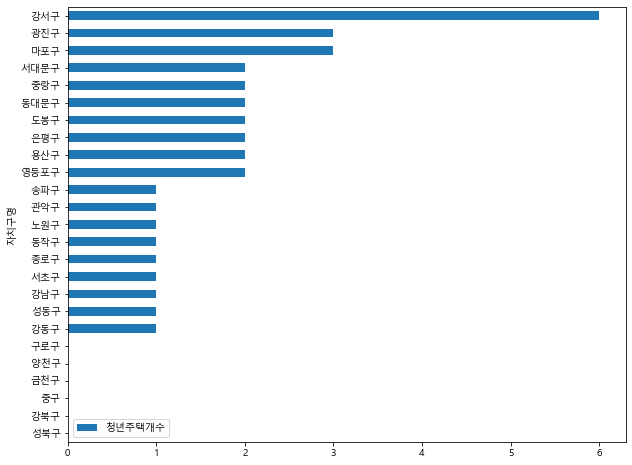

In [519]:
plt.figure(figsize=(10,8))
df_jutaek = df_jutaek.sort_values(by=['청년주택개수'], ascending=True) 
df_jutaek.plot.barh(x="자치구명", y="청년주택개수");

# AHP 분석

In [520]:
df_num = df[['버스정류장수', '전세보증금', '월세', '환승제외', '환승역', '슈퍼개수', '공원수', '영화관수',
       '커피-음료', '범죄5대', '선호가게수']]

In [521]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / std_value
    return result

In [522]:
df_num = df[['버스정류장수', '전세보증금', '월세', '환승제외', '환승역', '공원수', '영화관수',
       '커피-음료', '범죄5대', '선호가게수']]

In [523]:
df_num

,버스정류장수,전세보증금,월세,환승제외,환승역,공원수,영화관수,커피-음료,범죄5대,선호가게수
0,351,26000.0,55.0,12.25,5.75,108,2,847,2381,1321.255
1,463,37800.0,52.0,15.00,4.00,88,2,759,2112,1284.579
2,288,22000.0,45.0,9.00,2.00,68,5,823,3087,1504.932
3,608,26000.0,45.0,9.00,0.00,122,3,725,2411,1373.904
4,420,15750.0,40.0,3.00,0.00,84,3,480,2301,1245.598
5,387,18900.0,35.0,10.00,3.00,109,3,486,3210,1392.233
6,412,25000.0,50.0,11.00,4.00,104,8,1353,2712,2026.549
7,235,26000.0,60.0,13.75,9.25,76,8,1196,2861,2049.242
8,316,22000.0,45.0,8.00,3.00,92,1,664,2959,1615.436
9,375,19000.0,43.0,6.00,2.00,80,1,367,1860,949.143


In [524]:
df_norm = normalize(df_num)
df_norm

,버스정류장수,전세보증금,월세,환승제외,환승역,공원수,영화관수,커피-음료,범죄5대,선호가게수
0,-0.938385,0.070274,0.815125,0.224459,1.221736,-0.279826,-0.746851,-0.151760,-0.878612,-0.625831
1,0.102200,1.568122,0.484669,0.770710,0.432792,-0.822123,-0.746851,-0.328599,-1.161054,-0.685312
2,-1.523715,-0.437470,-0.286395,-0.421110,-0.468858,-1.364421,0.586812,-0.199989,-0.137336,-0.327940
3,1.449387,0.070274,-0.286395,-0.421110,-1.370509,0.099783,-0.302297,-0.396923,-0.847113,-0.540444
4,-0.297310,-1.230822,-0.837155,-1.612929,-1.370509,-0.930583,-0.302297,-0.889258,-0.962610,-0.748533
5,-0.603911,-0.830973,-1.387915,-0.222473,-0.018033,-0.252711,-0.302297,-0.877200,-0.008190,-0.510717
6,-0.371638,-0.056662,0.264365,-0.023836,0.432792,-0.388285,1.920474,0.865063,-0.531073,0.518028
7,-2.016135,0.070274,1.365885,0.522414,2.799625,-1.147502,1.920474,0.549567,-0.374628,0.554832
8,-1.263568,-0.437470,-0.286395,-0.619746,-0.018033,-0.713664,-1.191405,-0.519504,-0.271731,-0.148722
9,-0.715403,-0.818279,-0.506699,-1.017019,-0.468858,-1.039042,-1.191405,-1.116335,-1.425645,-1.229329


In [525]:
stand_df = pd.DataFrame()

In [526]:
stand_df["표준화교통합"] = df_norm["버스정류장수"] + df_norm["환승제외"] + df_norm["환승역"]
stand_df["표준화경제합"] = df_norm["전세보증금"] + df_norm["월세"]
stand_df["표준화여가합"] = df_norm["공원수"] + df_norm["영화관수"]
stand_df["표준화음식합"] = df_norm["커피-음료"] + df_norm["선호가게수"]
stand_df["표준화음식합"] = df_norm["커피-음료"] + df_norm["선호가게수"]
stand_df["표준화범죄합"] = df_norm["범죄5대"]

In [527]:
stand_df

,표준화교통합,표준화경제합,표준화여가합,표준화음식합,표준화범죄합
0,0.507811,0.885399,-1.026677,-0.777590,-0.878612
1,1.305703,2.052791,-1.568974,-1.013911,-1.161054
2,-2.413682,-0.723866,-0.777609,-0.527928,-0.137336
3,-0.342231,-0.216121,-0.202514,-0.937366,-0.847113
4,-3.280748,-2.067977,-1.232879,-1.637790,-0.962610
5,-0.844417,-2.218888,-0.555008,-1.387918,-0.008190
6,0.037318,0.207703,1.532189,1.383091,-0.531073
7,1.305905,1.436160,0.772973,1.104399,-0.374628
8,-1.901347,-0.723866,-1.905069,-0.668226,-0.271731
9,-2.201280,-1.324978,-2.230447,-2.345663,-1.425645


### 설문조사 가중치

In [529]:
weight = np.array([0.207, -0.291, 0.166, 0.170, -0.165])
weight

array([ 0.207, -0.291,  0.166,  0.17 , -0.165])

### 부분회귀계수 Ratio 가중치

In [530]:
교통 = 2.3736097
경제 = 2.4360929
여가 = 0.1814101
범죄 = 0.6441173 
음식 = 1.9492100

total = 교통 + 경제 + 여가 + 범죄 + 음식
교통가 = 교통 / total
경제가 = 경제 / total
여가가 = 여가 / total
범죄가 = 범죄 / total
음식가 = 음식 / total

In [531]:
weight2 = np.array([교통가, -경제가, 여가가, 음식가, -범죄가])
weight2

array([ 0.31295781, -0.32119615,  0.02391872,  0.25700118, -0.08492615])

In [532]:
score_df = pd.DataFrame()
score_df2 = pd.DataFrame()

In [533]:
for i in range(len(stand_df)) :
    score_df.loc[i, ["Total_score"]] = np.dot(stand_df.iloc[i], weight.T)
    score_df2.loc[i, ["Total_score"]] = np.dot(stand_df.iloc[i], weight2.T)

In [534]:
score_df

,Total_score
0,-0.310182
1,-0.568322
2,-0.485158
3,-0.061147
4,-0.401585
5,0.144176
6,0.524379
7,0.230275
8,-0.567938
9,-0.603882


In [535]:
df_sulmoon = pd.concat([stand_df,score_df], axis = 1)
df_regress = pd.concat([stand_df,score_df2], axis = 1)

df_sulmoon = pd.concat([df_sulmoon,df_cate], axis = 1)
df_regress = pd.concat([df_regress,df_cate], axis = 1)

In [536]:
stand_df

,표준화교통합,표준화경제합,표준화여가합,표준화음식합,표준화범죄합
0,0.507811,0.885399,-1.026677,-0.777590,-0.878612
1,1.305703,2.052791,-1.568974,-1.013911,-1.161054
2,-2.413682,-0.723866,-0.777609,-0.527928,-0.137336
3,-0.342231,-0.216121,-0.202514,-0.937366,-0.847113
4,-3.280748,-2.067977,-1.232879,-1.637790,-0.962610
5,-0.844417,-2.218888,-0.555008,-1.387918,-0.008190
6,0.037318,0.207703,1.532189,1.383091,-0.531073
7,1.305905,1.436160,0.772973,1.104399,-0.374628
8,-1.901347,-0.723866,-1.905069,-0.668226,-0.271731
9,-2.201280,-1.324978,-2.230447,-2.345663,-1.425645


### 설문조사 데이터 가중치 총점 sort

In [538]:
df_sulmoon.sort_values("Total_score", ascending = False)

,표준화교통합,표준화경제합,표준화여가합,표준화음식합,표준화범죄합,Total_score,자치구명
13,3.229357,0.775247,2.172230,3.147132,0.338299,1.282663,마포구
16,2.710828,-0.723866,2.069453,0.566700,0.712088,1.094160,강서구
10,1.200880,-0.574589,2.530406,-1.116326,0.217553,0.610163,노원구
19,1.955616,-0.317670,-0.582122,1.871042,1.009228,0.552177,영등포구
6,0.037318,0.207703,1.532189,1.383091,-0.531073,0.524379,종로구
11,1.100012,-1.426949,-0.267460,-0.984048,0.027509,0.426719,은평구
22,4.371151,5.881036,3.603636,6.536305,3.074514,0.395527,강남구
23,1.938776,1.363244,1.207460,2.083046,1.570961,0.299970,송파구
7,1.305905,1.436160,0.772973,1.104399,-0.374628,0.230275,중구
15,0.246602,-1.401562,-0.582122,-0.654928,0.281601,0.204467,구로구


### 회귀계수 비율데이터 총점 sort

In [540]:
df_regress.sort_values("Total_score", ascending = False)

,표준화교통합,표준화경제합,표준화여가합,표준화음식합,표준화범죄합,Total_score,자치구명
13,3.229357,0.775247,2.172230,3.147132,0.338299,1.593689,마포구
16,2.710828,-0.723866,2.069453,0.566700,0.712088,1.215544,강서구
19,1.955616,-0.317670,-0.582122,1.871042,1.009228,1.095286,영등포구
22,4.371151,5.881036,3.603636,6.536305,3.074514,0.983945,강남구
23,1.938776,1.363244,1.207460,2.083046,1.570961,0.599697,송파구
11,1.100012,-1.426949,-0.267460,-0.984048,0.027509,0.540953,은평구
6,0.037318,0.207703,1.532189,1.383091,-0.531073,0.382172,종로구
15,0.246602,-1.401562,-0.582122,-0.654928,0.281601,0.321196,구로구
10,1.200880,-0.574589,2.530406,-1.116326,0.217553,0.315531,노원구
7,1.305905,1.436160,0.772973,1.104399,-0.374628,0.281540,중구


In [541]:
df_sulmoon.to_csv("sulmoon.csv", encoding = "cp949", index = False)
df_regress.to_csv("regress.csv", encoding = "cp949", index = False)